In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.types import *

In [2]:
!hdfs dfsadmin -safemode leave

Safe mode is OFF


In [7]:
#!hdfs dfs -ls /

In [3]:
conf = SparkConf()\
    .set("spark.executor.instances", "2")\
    .set("spark.executor.cores", "1")\
    .set("spark.executor.memory", "1g")

In [4]:
spark = SparkSession.builder.config(conf=conf).master(master="yarn").appName("Martyushev_spark").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/22 01:14:46 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [26]:
#sc = SparkContext(appName="Martyushev_spark", master="yarn")

In [5]:
spark

In [11]:
#df = spark.range(int(1e6))\
#    .withColumn("value", f.lit("bla bla bla"))\
#    .cache()
#df.show()

In [6]:
!hdfs dfs -rm -r ml-latest-small
!hdfs dfs -put ml-latest-small .

rm: `ml-latest-small': No such file or directory


In [7]:
tags = spark.sparkContext.textFile("ml-latest-small/tags.csv")
print(tags.count() - 1)

3683


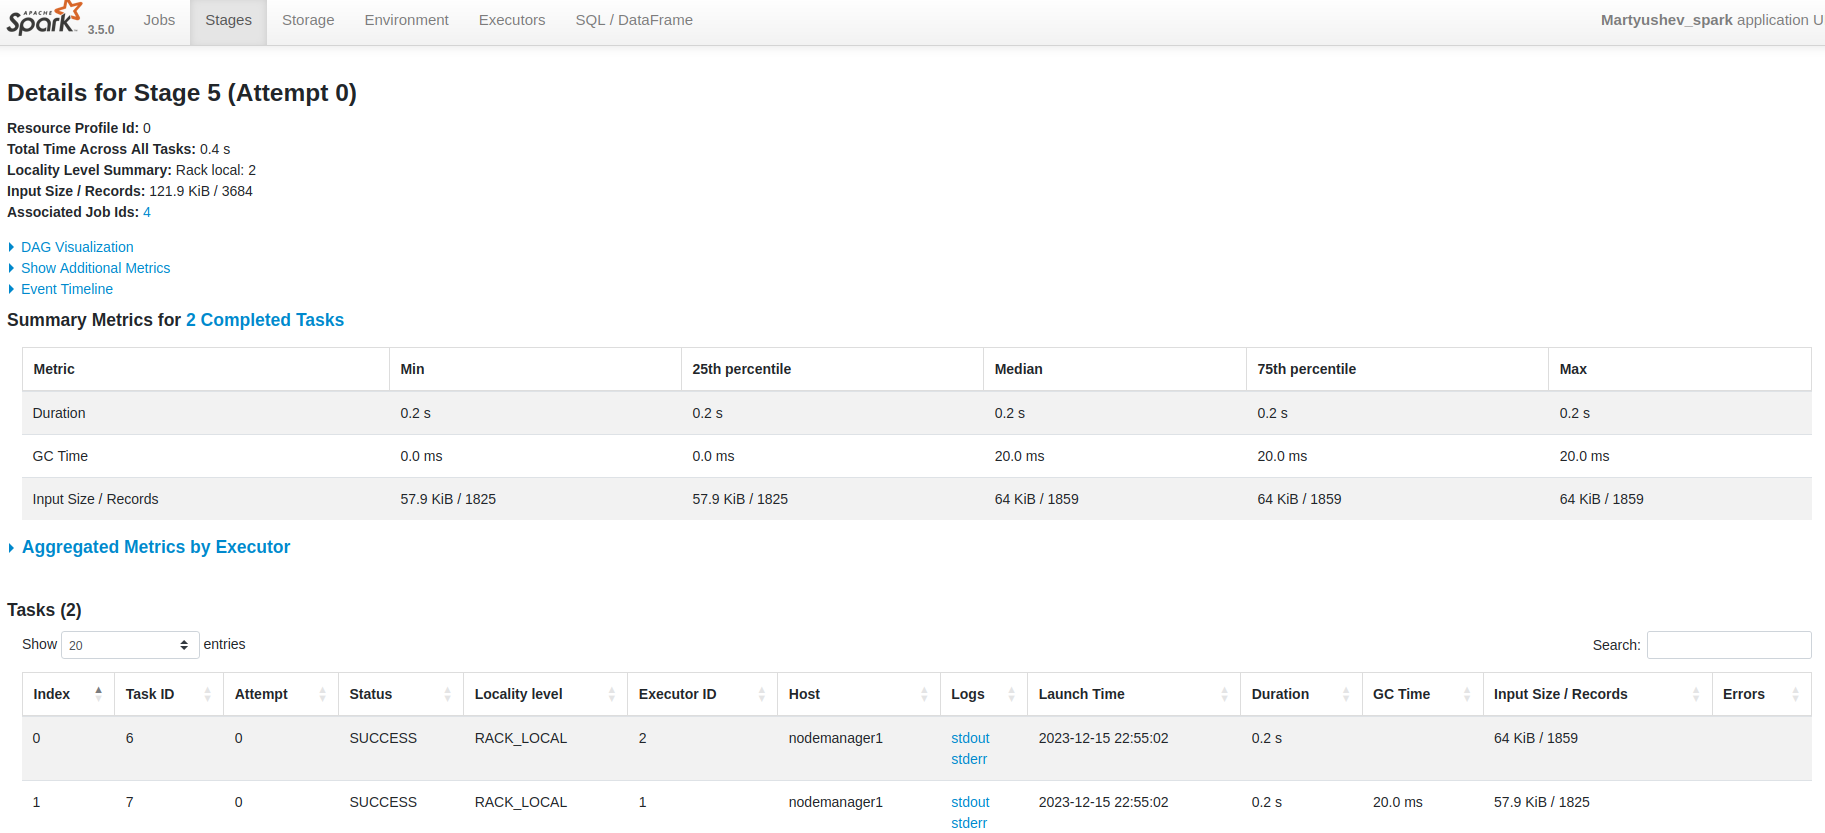

In [8]:
ratings = spark.sparkContext.textFile("ml-latest-small/ratings.csv")
print(ratings.count() - 1)

100836


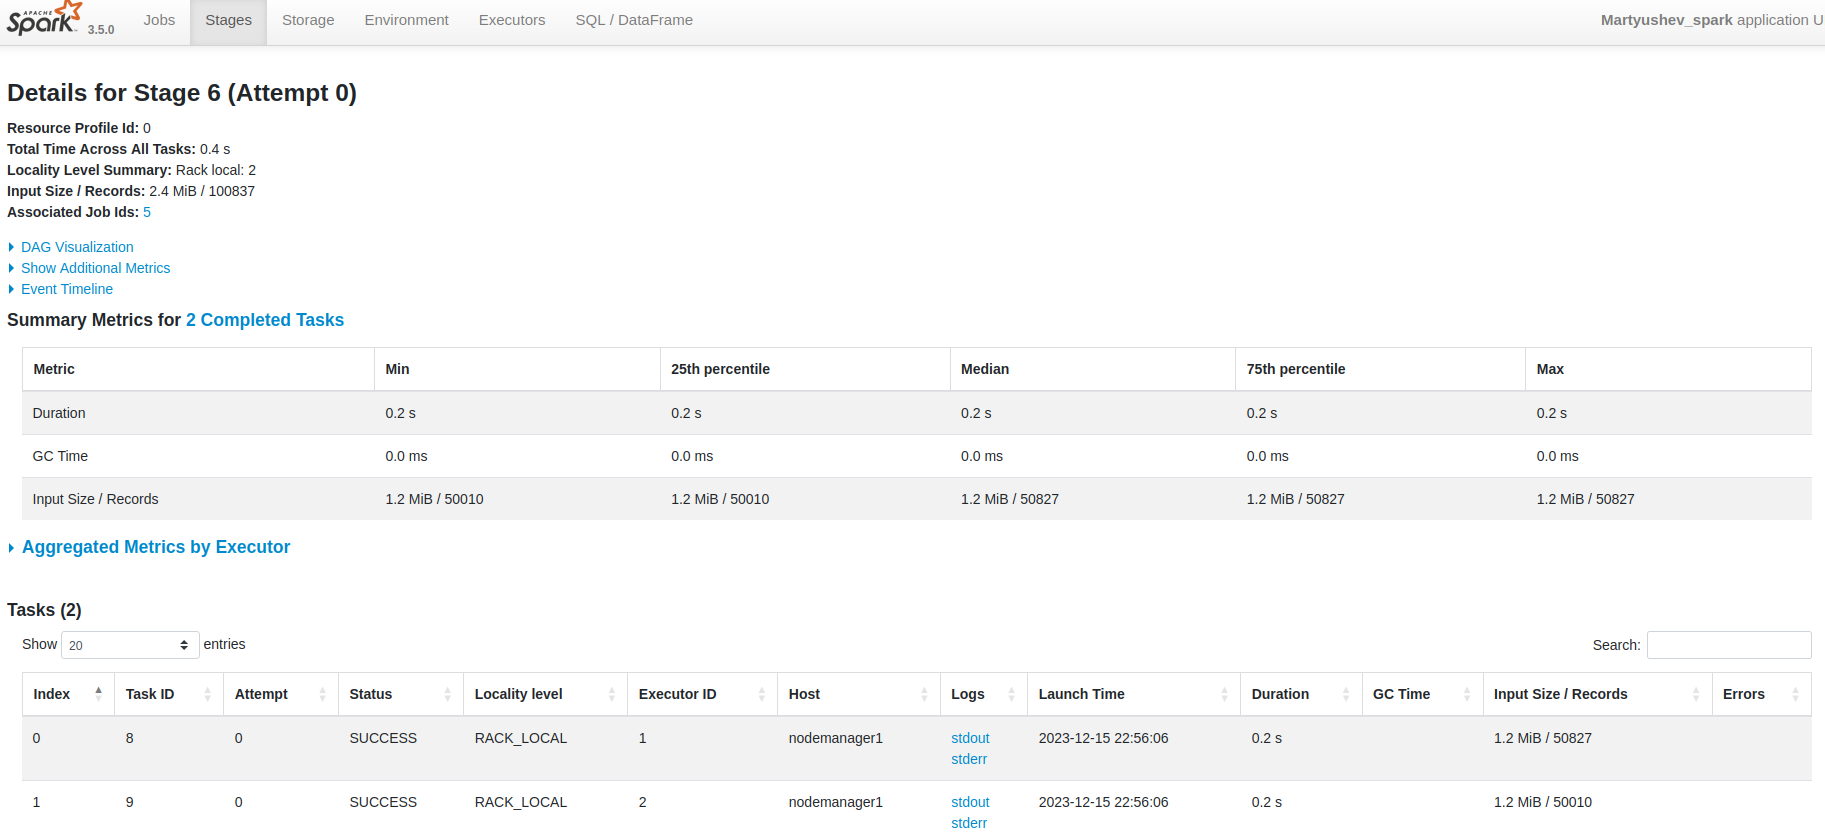

В каждом задании было по две таски. Стейдже всего 6, т.к. я раньше позапускал ещё пару задач по типу той, что закоменчена выше в ячейках

### 1.2. 

Честно, без понятия, почему этот вариант решения на 1 меньше. Но если глянуть в датасеты, то он как раз и правильный.

In [9]:
ratings_schema = StructType(fields=[
    StructField("userId", IntegerType()),
    StructField("movieId", IntegerType()),
    StructField("rating", DoubleType()),
    StructField("timestamp", LongType()),
])

In [10]:
ratings_df = spark\
    .read\
    .format("csv")\
    .option("header", "True")\
    .schema(ratings_schema)\
    .load("./ml-latest-small/ratings.csv")

In [11]:
ratings_df.count()

100836

In [12]:
tags_schema = StructType(fields=[
    StructField("userId", IntegerType()),
    StructField("movieId", IntegerType()),
    StructField("tag", StringType()),
    StructField("timestamp", LongType()),
])

In [13]:
tags_df = spark\
    .read\
    .format("csv")\
    .option("header", "True")\
    .schema(tags_schema)\
    .load("./ml-latest-small/tags.csv")

In [14]:
tags_df.count()

3683

### 2. Работа с Данными.

In [57]:
# Task A)
print("UNIQUE MOVIES:" + str(ratings_df.groupby("movieId").count().count()))

print("UNIQUE USERS:" + str(ratings_df.groupby("userId").count().count()))

UNIQUE MOVIES:9724
UNIQUE USERS:610


In [81]:
# Task B)
print(ratings_df)
print("FILMS WITH RATING >= 4.0" + str(ratings_df.where("rating >= 4.0").count()))

DataFrame[userId: int, movieId: int, rating: double, timestamp: bigint]
FILMS WITH RATING >= 4.048580


In [79]:
# Task C)
print(ratings_df.orderBy("rating", ascending=False).show(100))

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|   1617|   5.0|964982951|
|     1|   1625|   5.0|964983504|
|     1|     47|   5.0|964983815|
|     1|   1732|   5.0|964981125|
|     1|    101|   5.0|964980868|
|     1|   1804|   5.0|964983034|
|     1|    157|   5.0|964984100|
|     1|   1927|   5.0|964981497|
|     1|    216|   5.0|964981208|
|     1|   1954|   5.0|964982176|
|     1|    260|   5.0|964981680|
|     1|   2005|   5.0|964981710|
|     1|    362|   5.0|964982588|
|     1|   2018|   5.0|964980523|
|     1|    527|   5.0|964984002|
|     1|   2033|   5.0|964982903|
|     1|    596|   5.0|964982838|
|     1|   2048|   5.0|964982791|
|     1|    661|   5.0|964982838|
|     1|   2058|   5.0|964982400|
|     1|    923|   5.0|964981529|
|     1|   2078|   5.0|964982838|
|     1|    954|   5.0|964983219|
|     1|   2090|   5.0|964982838|
|     1|   1024|   5.0|964982876|
|     1|   2094|   5.0|964982653|
|     1|   102

### Дорешка 1.

Задачи, отправленные после дедлайна.

In [26]:
# Task C2)
# После поправки в чате курса
ratings_df.groupBy("movieId").avg("rating").orderBy(f.col("avg(rating)").desc()).show(100)

+-------+-----------+
|movieId|avg(rating)|
+-------+-----------+
|  80124|        5.0|
|  74226|        5.0|
| 175387|        5.0|
|    148|        5.0|
| 158027|        5.0|
|  67618|        5.0|
|  42556|        5.0|
| 142444|        5.0|
|  44943|        5.0|
|  27523|        5.0|
| 113829|        5.0|
|   3073|        5.0|
| 152711|        5.0|
| 132333|        5.0|
|     53|        5.0|
|  27704|        5.0|
| 147300|        5.0|
| 187717|        5.0|
|    633|        5.0|
|   8238|        5.0|
|    876|        5.0|
| 120138|        5.0|
|  53578|        5.0|
| 163072|        5.0|
| 160644|        5.0|
| 172909|        5.0|
|   5490|        5.0|
| 172583|        5.0|
|   2972|        5.0|
|   2196|        5.0|
|  25887|        5.0|
| 118834|        5.0|
|   3795|        5.0|
| 156025|        5.0|
|   3941|        5.0|
| 120130|        5.0|
|    626|        5.0|
|   1349|        5.0|
|  26928|        5.0|
| 122092|        5.0|
|  40491|        5.0|
|  71268|        5.0|
| 167064| 

In [34]:
# Task D)
timestamps_joined = ratings_df.alias('time_r')\
                              .join(tags_df.alias("time_t"), on=["userId", "movieId"], how="inner")
#print(timestamps_joined.show(15))
timestamps_average = timestamps_joined.select(
        f.col('time_r.userId').alias('user_id'),
        f.col('time_r.movieId').alias('movie_id'),
        (f.col('time_t.timestamp') - f.col('time_r.timestamp')).alias('ans'))

print("DELTA BY USER: ")
timestamps_average.groupBy("user_id").avg("ans").select(
        f.col("user_id").alias("user_id"),
        (f.col("avg(ans)") / 1000).alias("delta_by_user")).show(15)

DELTA BY USER: 
+-------+--------------------+
|user_id|         ans_by_user|
+-------+--------------------+
|    513|               0.075|
|    193|-0.10741176470588235|
|    300|               0.326|
|     76|               -0.01|
|    606|  2441.5348333333336|
|    103|             -0.1694|
|    336|  3921.8145555555557|
|    319| 0.13733333333333334|
|    599|-0.18149226006191949|
|    177|               0.267|
|    132|          2274.74525|
|    305|         1766.819625|
|    291|              41.831|
|    435|0.012666666666666666|
|    274|               0.047|
+-------+--------------------+
only showing top 15 rows



In [46]:
print("DELTA BY ALL USERS:")
timestamps_average.select((f.avg('ans') / 1000).alias("delta_by_all_users")).show()

DELTA BY ALL USERS:
+------------------+
|  ans_by_all_users|
+------------------+
|26243.727372266974|
+------------------+



In [33]:
# Task E)
average_ratings_user = ratings_df.groupBy("userId").avg("rating")
#.show(10)
print("AVERAGE RATINGS BY ALL USERS:")
average_ratings_total = average_ratings_user.agg(f.avg("avg(rating)").alias("average_by_all_users")).show(10)

AVERAGE RATINGS BY ALL USERS:
+--------------------+
|average_by_all_users|
+--------------------+
|  3.6572223377474016|
+--------------------+



### 3. UDF

In [27]:
ratings_pandas = ratings_df.toPandas()
tags_pandas = tags_df.toPandas()

In [28]:
ratings_pandas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
